# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


### Audrey Maurette
### Alexandre TONON

## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataframe=pd.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [3]:
dataframe.head()

df_brand1 = dataframe[dataframe["Brand"] == "Brand_1"]
df_brand2 = dataframe[dataframe["Brand"] == "Brand_2"]

df_brand1.describe()

,Concentration,Efficiency
count,50.000000,50.000000
mean,5.285968,3.749378
std,2.745240,1.397119
min,0.402640,1.099200
25%,3.458750,2.766100
50%,5.531650,3.790600
75%,7.627775,4.748475
max,9.858800,5.926600


In [4]:
df_brand2.describe()

,Concentration,Efficiency
count,20.000000,20.000000
mean,4.617638,4.216485
std,3.077085,1.066503
min,0.800660,2.177800
25%,2.075400,3.645375
50%,3.753500,4.030550
75%,6.873100,4.717200
max,9.974900,6.731900


1) En supposant que le rendement initial (sans produit) soit de 1, il semble que le produit ait de l'effet car pour les deux marques, l'ensemble des valeurs de EFficiency sont supérieures à 1

2) L'effet semble dépendre de la concentration pour chaque marque, il est donc difficile de répondre à cette question sans poursuivre l'étude car rien n'indique que les conditions de test sont identiques pour les deux marques : 
    - L'intervalle des valeurs testées n'est pas le même ([0,40, 9,86] pour la marque 1 et [0,80, 9,97])  
    - Le nombre de valeurs testées est différent (50 pour la marque 1 et 20 pour la marque 2)  

    Ainsi sans relation entre concentration et efficacité on ne peut pas conclure  

3) Comme mentionné dans la 2. la concentration semble avoir un effet sur l'efficacité

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

Démarche :

1) Pour s'assurer de l'effet du produit on estime le coefficient de la relation affine pour chaque marque tel que  
Efficiency = B0 + B1 * Concentration :
- Si B0 > 1 et B1 nul alors le produit a un effet positif sur l'efficacité mais celui ci ne dépend pas de la concentration
- Si B0 = 1 et B1 nul alors l'efficacité est inchangée et le produit n'a pas d'impact
- Si B1 est supérieur à 0 alors le produit a un effet positif sur l'efficacité et il dépend de la concentration. Et inversement si il est négatif

2) Pour comparer l'effet par marque :
- Dans un premier temps, on affiche nos regressions issues de l'estimation de nos paramètres réalisées en 1. et on regarde les tendances
- Dans un second temps, comme nous avons peu de données, il se peu qu'on surrestime l'effet de la marque sur l'évolution de l'efficacité en fonction de la concentration. POur se forger une opinion plus robuste, on réalise un test statistiques : H0 = "les droites sont de pentes identiques pour les deux marques".
Grace aux hypothèses relation linéaire et distribution du bruit qui suit une loi Normale centrée, on peut réaliser un test de Fischer.


Pour la marque 1, B0 est non nul et B1 vaut [0.4914818]
Pour la marque 2, B0 est non nul et B1 vaut [0.3090176]


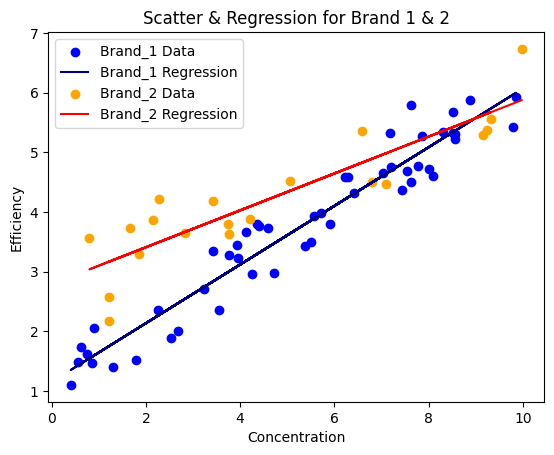

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X1 = df_brand1["Concentration"].values.reshape(-1, 1)
y1 = df_brand1["Efficiency"].values

X2 = df_brand2["Concentration"].values.reshape(-1, 1)
y2 = df_brand2["Efficiency"].values

lr_brand1 = LinearRegression()
lr_brand2 = LinearRegression()

lr_brand1.fit(X1, y1)
lr_brand2.fit(X2, y2)


plt.scatter(df_brand1['Concentration'], df_brand1['Efficiency'], color='blue', label='Brand_1 Data')
plt.plot(df_brand1['Concentration'], lr_brand1.predict(df_brand1['Concentration'].values.reshape(-1,1)), color='navy', label='Brand_1 Regression')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.title('Scatter & Regression for Brand 1 & 2')

plt.scatter(df_brand2['Concentration'], df_brand2['Efficiency'], color='orange', label='Brand_2 Data')
plt.plot(df_brand2['Concentration'], lr_brand2.predict(df_brand2['Concentration'].values.reshape(-1,1)), color='red', label='Brand_2 Regression')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()


print(f"Pour la marque 1, B0 est non nul et B1 vaut {lr_brand1.coef_}")
print(f"Pour la marque 2, B0 est non nul et B1 vaut {lr_brand2.coef_}")

Les deux valeurs de B1 sont non nulles donc le produit à bien un effet sur l'efficacité.

On constate qu'il y a  visuellement deux tendances différentes sur l'intervalle de concentration considéré. Pour autant cet écart est marqué dans les faibles concentration, qui sont possiblement moins fiables du point de vue de l'expérience. De plus on a peu de données Un test statistique s'impose donc pour valider cette hypothèse. On va réaliser un test de Fischer pour tester H0 : "les droites ont la même pente"

In [6]:
from scipy.stats import f

# -----------------------
# Modèle complet (pentes différentes)
# -----------------------
y_pred1 = lr_brand1.predict(X1)
y_pred2 = lr_brand2.predict(X2)

RSS_full = np.sum((y1 - y_pred1) ** 2) + np.sum((y2 - y_pred2) ** 2)

# -----------------------
# Modèle réduit (pente commune, intercepts différents)
# -----------------------
# On recrée un DataFrame combiné
df = pd.concat([df_brand1.assign(Marque=0), df_brand2.assign(Marque=1)], axis=0)

# Dummy pour marque
X_reduced = np.column_stack([df["Concentration"], df["Marque"]])  # x + dummy marque
y = df["Efficiency"].values

model_reduced = LinearRegression().fit(X_reduced, y)
y_pred_reduced = model_reduced.predict(X_reduced)

RSS_reduced = np.sum((y - y_pred_reduced) ** 2)

# -----------------------
# Test de Fisher
# -----------------------
n = len(df)

# nombre de paramètres estimés
p_reduced = X_reduced.shape[1] + 1  # β0, β1, γ
p_full = 4                          # β01, β11, β02, β12 (2 régressions séparées)

# Le degré de liberté des résidus est n -  p avec  p le nombre de paramètres estimés
df_reduced = n - p_reduced
df_full = n - p_full

df_num = df_reduced - df_full 
df_den = df_full

F_stat = ((RSS_reduced - RSS_full) / df_num) / (RSS_full / df_den)
p_value = 1 - f.cdf(F_stat, df_num, df_den)

# -----------------------
# Résultats
# -----------------------
print("=== Résultats du test de Fisher ===")
print(f"RSS réduit   = {RSS_reduced:.3f}")
print(f"RSS complet  = {RSS_full:.3f}")
print(f"F = {F_stat:.3f}")
print(f"p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Les pentes diffèrent significativement entre les deux marques (on rejette H0).")
else:
    print("On ne rejette pas H0 : pente commune suffisante (droites parallèles).")


=== Résultats du test de Fisher ===
RSS réduit   = 14.903
RSS complet  = 10.876
F = 24.441
p-value = 0.000006
Les pentes diffèrent significativement entre les deux marques (on rejette H0).


## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

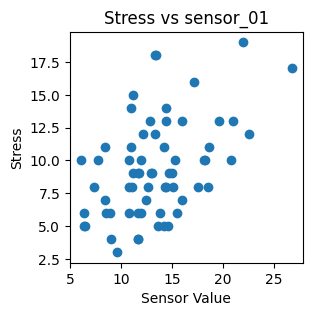

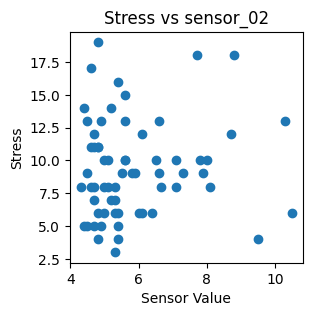

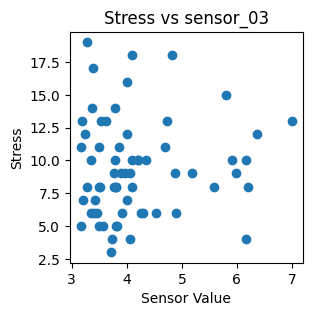

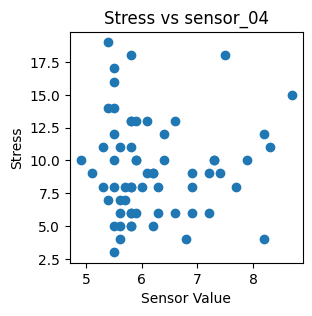

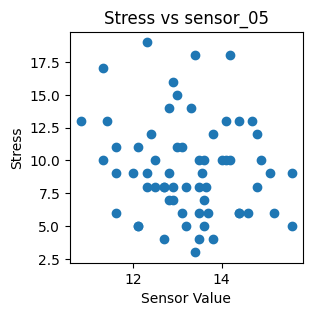

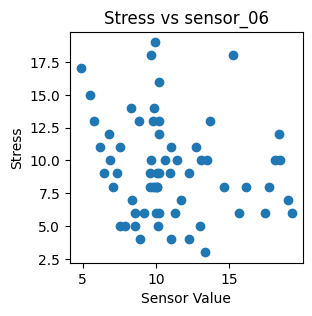

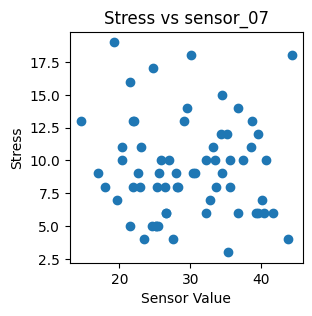

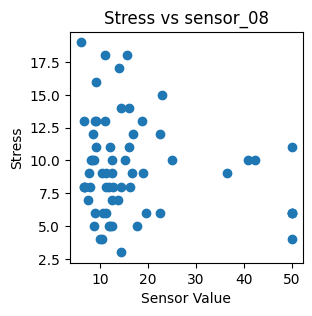

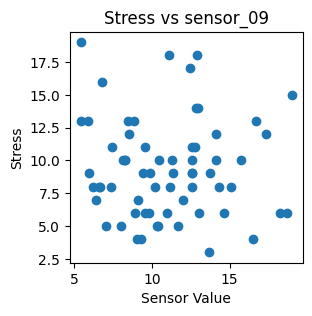

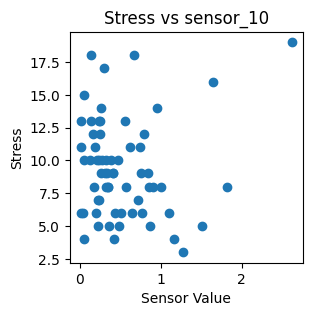

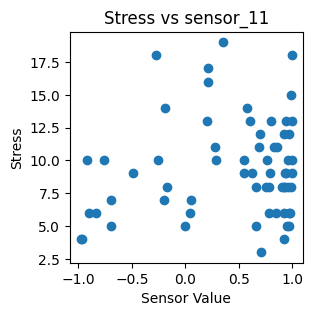

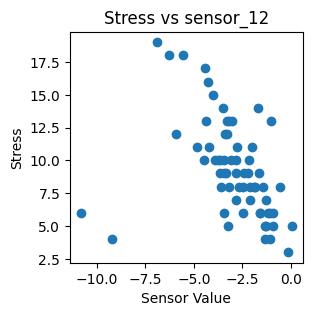

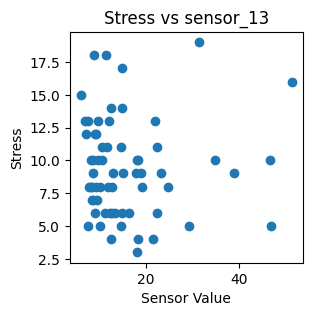

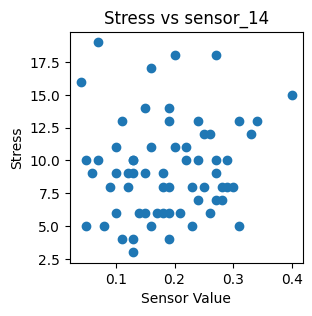

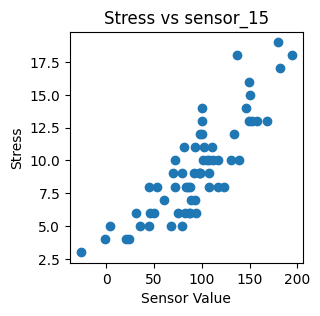

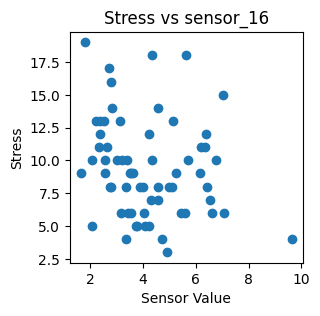

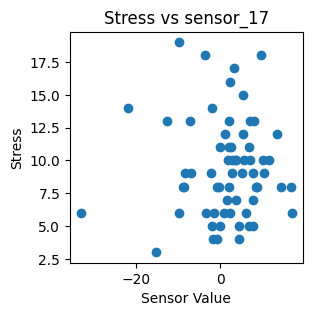

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


X = pd.read_csv("E2_sensor_vals.csv",sep=';', dtype=float)
Y = pd.read_csv("E2_stress_vals.csv",sep=';', dtype=float)

list_MSE = []
for i, col in enumerate(X.columns):
    plt.figure(figsize=(3, 3))
    plt.scatter(X[col], Y, label=col)
    plt.xlabel("Sensor Value")
    plt.ylabel('Stress')
    plt.title(f'Stress vs {col}')
    


Les capteurs les plus pertinents semblent être le 1, 12 et le 15. Les autres sont soit trop ruités, soit ne semblent pas être affectés par le stress (pente nulle)


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


In [8]:
### infos sur le dataset ###
n_samples, n_features = X.shape
print(f"Nombre d'échantillons: {n_samples}")


Nombre d'échantillons: 64


Etant donné le nombre raisonnable d'échantillons et le faible nombre de features on peut faire un kfold

In [9]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

lr_sensor_01 = LinearRegression()
lr_sensor_12 = LinearRegression()
lr_sensor_15 = LinearRegression()

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    lr_sensor_01.fit(X_train[["sensor_01"]], Y_train)
    lr_sensor_12.fit(X_train[["sensor_12"]], Y_train)
    lr_sensor_15.fit(X_train[["sensor_15"]], Y_train)
    
    Y_pred_01 = lr_sensor_01.predict(X_test[["sensor_01"]])
    Y_pred_12 = lr_sensor_12.predict(X_test[["sensor_12"]])
    Y_pred_15 = lr_sensor_15.predict(X_test[["sensor_15"]])
    
    MSE_01 = np.mean((Y_test - Y_pred_01) ** 2)
    MSE_12 = np.mean((Y_test - Y_pred_12) ** 2)
    MSE_15 = np.mean((Y_test - Y_pred_15) ** 2)
    
    list_MSE.append((MSE_01, MSE_12, MSE_15))

mean_MSE = np.mean(list_MSE, axis=0)
print(f"MSE moyen pour sensor_01: {mean_MSE[0]}")
print(f"MSE moyen pour sensor_12: {mean_MSE[1]}")
print(f"MSE moyen pour sensor_15: {mean_MSE[2]}")


MSE moyen pour sensor_01: 11.359769969637616
MSE moyen pour sensor_12: 14.757398470935172
MSE moyen pour sensor_15: 4.203177787929553


On souhaite savoir si une variable X a un effet sur Y. L’hypothèse nulle H0 est que X n’a aucun effet sur Y.  
Pour le tester, on utilise un test de Fisher, qui compare la variance expliquée par la régression à la variance des résidus. Ce test est approprié car on ne fait pas d’hypothèse sur la variance des erreurs. Si la statistique F calculée est supérieure à la valeur critique, on rejette l’hypothèse nulle et on conclut que X a un effet significatif sur Y.

In [10]:
from scipy.stats import f

y_mean = np.mean(Y)
n_samples = len(Y)
SCT = np.sum((Y - y_mean)**2)

list_p = {}
for sensor in ["sensor_01", "sensor_12", "sensor_15"]:
    SCR = np.sum((Y - lr_sensor_01.predict(X[sensor].values.reshape(-1, 1)))**2)
    R2 = 1 - SCR/SCT
    F = R2 / (1 - R2) * (n_samples - 2)  # df1=1, df2=n-2
    list_p[sensor] = 1 - f.cdf(F, dfn=1, dfd=n_samples-2)

print("p-values pour les capteurs:")
for sensor, p_value in list_p.items():
    print(f"{sensor}: {p_value}")    




p-values pour les capteurs:
sensor_01: [9.18786786e-05]
sensor_12: [1.]
sensor_15: [1.]


/home/alexandre-tonon/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/alexandre-tonon/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/alexandre-tonon/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/alexandre-tonon/anaconda3/envs/myenv/l


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


Stratégie 1 - Idée custom - on regarde l'impact sur la MSE d'enlever le point

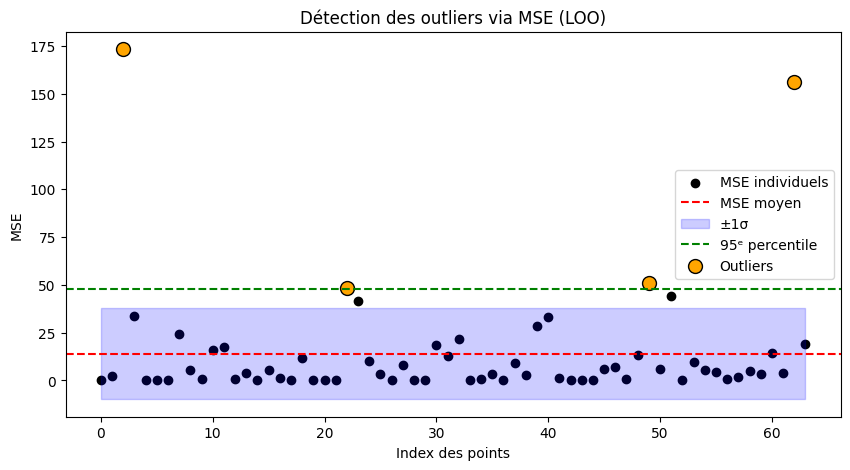

In [17]:
lr_sensor_12 = LinearRegression()

MSE_list = []
for i in range(len(X)):
    X_train = X.drop(index=i)
    Y_train = Y.drop(index=i)
    X_test = X.iloc[[i]]
    Y_test = Y.iloc[[i]]
    
    lr_sensor_12.fit(X_train[["sensor_12"]], Y_train)
    Y_pred = lr_sensor_12.predict(X_test[["sensor_12"]])
    
    MSE = np.mean((Y_test - Y_pred) ** 2)
    MSE_list.append(MSE)

MSE_array = np.array(MSE_list)
mse_mean = np.mean(MSE_array)
mse_std = np.std(MSE_array, ddof=1)
threshold = np.percentile(MSE_array, 95)
outliers = np.where(MSE_array > threshold)[0]

x = np.arange(len(MSE_array))
plt.figure(figsize=(10,5))
plt.scatter(x, MSE_array, color='black', label='MSE individuels')
plt.axhline(mse_mean, color='red', linestyle='--', label='MSE moyen')
plt.fill_between(x, mse_mean - threshold/2, mse_mean + threshold/2, color='blue', alpha=0.2, label='±1σ')
plt.axhline(threshold, color='green', linestyle='--', label='95ᵉ percentile')
plt.scatter(outliers, MSE_array[outliers], color='orange', s=100, edgecolors='k', label='Outliers')
plt.xlabel('Index des points')
plt.ylabel('MSE')
plt.title('Détection des outliers via MSE (LOO)')
plt.legend()

Methode 2


### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?




<span style="color:skyblue; font-weight:bold;"> Réponse Q2.4.1 </span>

Il faut centrer et réduire les données pour éviter les effets d'échelles : un capteur très sensible mais bruité risquerait d'écraser les autres avec ses valeurs élevées, car il sera beaucoup moins pénalisé par le terme correctif que les petits qui risquent d'être invisibles.

Ici notamment le capteur 12 a une amplitude plus faible.

<span style="color:skyblue; font-weight:bold;"> Réponse Q2.4.2 </span>

On réalise une regression lasso

In [55]:
outliers = np.where(MSE_array > 100)[0]

X_clean = X.drop(index=outliers)
Y_clean = Y.drop(index=outliers)

MSE moyen pour alpha = 0.01 : 23.01857503053883
MSE moyen pour alpha = 0.1 : 21.45524814021295
MSE moyen pour alpha = 1.0 : 16.783790209748158
MSE moyen pour alpha = 10.0 : 13.808615515330152
MSE moyen pour alpha = 100.0 : 13.808615515330152
MSE moyen pour alpha = 100.0 : 13.808615515330152


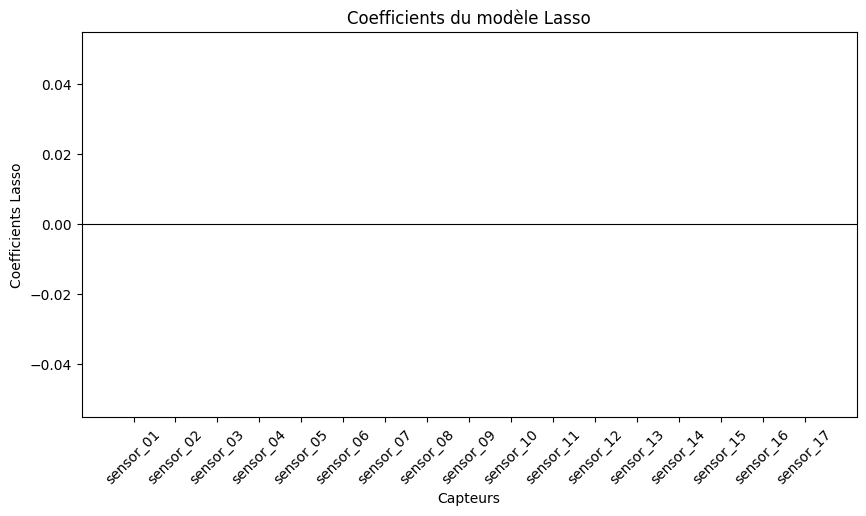

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for alpha in [0.01, 0.1, 1.0, 10.0, 100.0]:
    list_MSE = []
    lasso = Lasso(alpha=alpha)
    for train_index, test_index in kfold.split(X_clean):
        X_train, X_test = X_clean.iloc[train_index], X_clean.iloc[test_index]
        Y_train, Y_test = Y_clean.iloc[train_index], Y_clean.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test) 

        lasso.fit(X_train_scaled, Y_train)
        Y_pred = lasso.predict(X_test_scaled)

        MSE = np.mean((Y_test.values - Y_pred) ** 2)
        list_MSE.append(MSE)
    print("MSE moyen pour alpha =", alpha, ":", np.mean(list_MSE))

lasso = Lasso(alpha=1.0)
lasso.fit(StandardScaler().fit_transform(X_clean), Y_clean)

plt.figure(figsize=(10, 5))
plt.bar(X_clean.columns, lasso.coef_)
plt.xlabel('Capteurs')
plt.ylabel('Coefficients Lasso')
plt.title('Coefficients du modèle Lasso')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.show()